# Tutorial 2: Introduction to Reading Data

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
source("tests_tutorial_02.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding


Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null



## 1. Happiness Report
As you might remember from worksheet_02, we practiced loading data from the *Sustainable Development Solutions Network*'s [World Happiness Report](http://worldhappiness.report/). That data was the output of their analysis that calculated each country's happiness score and how much each variable contributed to it. In the tutorial, we are going to look at the data at an earlier stage of the study - the aggregated/averaged values (per country and per year) for many different social and health aspects that the researchers anticipated might contribute to happiness (Table2.1 from [this Excel spreadsheet](https://s3.amazonaws.com/happiness-report/2018/WHR2018Chapter2OnlineData.xls)).

The goal for today is to produce a plot of 2017 positive affect against healthy life expectancy at birth, where we plot healthy life expectancy at birth on the x-axis and positive affect on the y-axis. For this study, positive affect was defined as the average of three positive affect measures, specifically happiness, laugh and enjoyment. We would also like to convert the positive affect score from a scale of 0 - 1 to a scale from 0 - 10.

1. use `filter` to subset the rows where the year is equal to 2017
2. use `select` to subset the "Healthy life expectancy at birth" and "Positive affect" columns 
3. use `mutate` to convert the "Positive affect" score from a scale of 0 - 1 to a scale from 0 - 10
4. use `ggplot` to create our plot of "Healthy life expectancy at birth" (x - axis) and "Positive affect" (y - axis)

**Hints for success:** Try going through all the steps on your own, but don't forget to talk to others (classmates, TAs, Instructor) if you need help getting unstuck. Work with different functions and if something doesn't work out, read the *error message* or use the `help()` function. Since there are a lot of steps to working and modifying data, feel free to look back at `worksheet_02`. 

**Question 1.1** Multiple Choice: 
<br> {points: 1}

What is the maximum value for the Positive affect score (in the original data file that you read into R)?

A. 100

B. 10 

C. 1

D. 0.1

E. 5

*Assign your answer to an object called `answer1`.*

In [2]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1 <- 'C'

In [3]:
test_1.1()

[1] "Success!"


**Question 1.2** Multiple Choice: 
<br> {points: 1}

Which column's values will be used to filter the data?

A. `countries`

B. `generosity`

C. `positive affect`

D. `year`

*Assign your answer to an object called `answer2`.*

In [4]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer2 <- 'D'

In [5]:
test_1.2()

[1] "Success!"


**Question 1.3.0**
<br> {points: 1}

Use the appropriate `read_*` function to read in the `WHR2018Chapter2OnlineData` (look in the `tutorial_02` directory to ensure you use the correct relative path to read it in) and name it `happy_df_csv`.

In [6]:
# your code here
happy_df_csv <- read_csv('data/WHR2018Chapter2OnlineData.csv')
head(happy_df_csv)

Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(),
  `Life Ladder` = col_double(),
  `Log GDP per capita` = col_double(),
  `Social support` = col_double(),
  `Healthy life expectancy at birth` = col_double(),
  `Freedom to make life choices` = col_double(),
  Generosity = col_double(),
  `Perceptions of corruption` = col_double(),
  `Positive affect` = col_double(),
  `Negative affect` = col_double(),
  `Confidence in national government` = col_double(),
  `Democratic Quality` = col_double(),
  `Delivery Quality` = col_double(),
  `Standard deviation of ladder by country-year` = col_double(),
  `Standard deviation/Mean of ladder by country-year` = col_double(),
  `GINI index (World Bank estimate)` = col_double(),
  `GINI index (World Bank estimate), average 2000-15` = col_double(),
  `gini of household income reported in Gallup, by wp5-year` = col_double()
)


country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.168690,0.4506623,49.20966,0.7181143,0.18181947,0.8816863,0.5176372,0.2581955,0.6120721,-1.929690,-1.655084,1.774662,0.4765997,NA,NA,NA
Afghanistan,2009,4.401778,7.333790,0.5523084,49.62443,0.6788964,0.20361446,0.8500354,0.5839256,0.2370924,0.6115452,-2.044093,-1.635025,1.722688,0.3913617,NA,NA,0.4419058
Afghanistan,2010,4.758381,7.386629,0.5390752,50.00896,0.6001272,0.13763019,0.7067661,0.6182654,0.2753238,0.2993574,-1.991810,-1.617176,1.878622,0.3948027,NA,NA,0.3273182
Afghanistan,2011,3.831719,7.415019,0.5211036,50.36730,0.4959014,0.17532922,0.7311085,0.6113873,0.2671747,0.3073857,-1.919018,-1.616221,1.785360,0.4659422,NA,NA,0.3367642
Afghanistan,2012,3.782938,7.517126,0.5206367,50.70926,0.5309350,0.24715924,0.7756198,0.7103847,0.2679191,0.4354402,-1.842996,-1.404078,1.798283,0.4753669,NA,NA,0.3445396
Afghanistan,2013,3.572100,7.503376,0.4835519,51.04298,0.5779554,0.07473493,0.8232041,0.6205848,0.2733281,0.4828473,-1.879709,-1.403036,1.223690,0.3425687,NA,NA,0.3043685


In [7]:
test_1.3.0()

[1] "Success!"


**Question 1.3.1**
<br> {points: 1}

Above, you loaded the data from a file we already downloaded and converted to a `.csv` for you. But you can also use the `readxl` R package to directly load in Excel files into R. Given that the data we loaded above (`WHR2018Chapter2OnlineData.csv`) was originally sourced from an Excel file on the web, let's now directly read that Excel file into R using the `read_excel` function from that package. This Excel file has multiple sheets, the data we want is on the first one.

> #### Note:
> `read_excel` does not support putting a URL as the file path argument. So we need to first download the file and write it to disk using R's `download.file` function, and then we can read that saved Excel file into R using `read_excel`.

To answer the question, fill in the blanks in the code below. If you are unsure, try reading the documentation for the new functions and ask others for help!

In [8]:
library(readxl)
url = "https://s3.amazonaws.com/happiness-report/2018/WHR2018Chapter2OnlineData.xls"

download.file(url, destfile = "data/WHR2018Chapter2OnlineData.xls")
happy_df <- read_excel(path = "data/WHR2018Chapter2OnlineData.xls", sheet = 1)

# your code here
# ?read_excel
head(happy_df)

country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.168690,0.4506623,49.20966,0.7181143,0.18181947,0.8816863,0.5176372,0.2581955,0.6120721,-1.929690,-1.655084,1.774662,0.4765997,NA,NA,NA
Afghanistan,2009,4.401778,7.333790,0.5523084,49.62443,0.6788964,0.20361446,0.8500354,0.5839256,0.2370924,0.6115452,-2.044093,-1.635025,1.722688,0.3913617,NA,NA,0.4419058
Afghanistan,2010,4.758381,7.386629,0.5390752,50.00896,0.6001272,0.13763019,0.7067661,0.6182655,0.2753238,0.2993574,-1.991810,-1.617176,1.878622,0.3948027,NA,NA,0.3273182
Afghanistan,2011,3.831719,7.415019,0.5211036,50.36730,0.4959014,0.17532922,0.7311085,0.6113873,0.2671747,0.3073857,-1.919018,-1.616221,1.785360,0.4659422,NA,NA,0.3367642
Afghanistan,2012,3.782938,7.517126,0.5206367,50.70926,0.5309350,0.24715924,0.7756198,0.7103847,0.2679191,0.4354402,-1.842996,-1.404078,1.798283,0.4753669,NA,NA,0.3445396
Afghanistan,2013,3.572100,7.503376,0.4835519,51.04298,0.5779554,0.07473493,0.8232041,0.6205848,0.2733281,0.4828473,-1.879709,-1.403036,1.223690,0.3425687,NA,NA,0.3043685


In [9]:
test_1.3.1()

[1] "Success!"


Look at the column names - they contain spaces!!! This is not a best practice and will make it difficult to use our tidyverse functions... Run the cell below to use the `make.names` function that will replace all the spaces with a `.` so we don't have this problem. The `colnames` function is also needed to access the data frame's column names.

In [10]:
# run this cell
colnames(happy_df) <- make.names(colnames(happy_df))
head(happy_df)


country,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect,Confidence.in.national.government,Democratic.Quality,Delivery.Quality,Standard.deviation.of.ladder.by.country.year,Standard.deviation.Mean.of.ladder.by.country.year,GINI.index..World.Bank.estimate.,GINI.index..World.Bank.estimate...average.2000.15,gini.of.household.income.reported.in.Gallup..by.wp5.year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.168690,0.4506623,49.20966,0.7181143,0.18181947,0.8816863,0.5176372,0.2581955,0.6120721,-1.929690,-1.655084,1.774662,0.4765997,NA,NA,NA
Afghanistan,2009,4.401778,7.333790,0.5523084,49.62443,0.6788964,0.20361446,0.8500354,0.5839256,0.2370924,0.6115452,-2.044093,-1.635025,1.722688,0.3913617,NA,NA,0.4419058
Afghanistan,2010,4.758381,7.386629,0.5390752,50.00896,0.6001272,0.13763019,0.7067661,0.6182655,0.2753238,0.2993574,-1.991810,-1.617176,1.878622,0.3948027,NA,NA,0.3273182
Afghanistan,2011,3.831719,7.415019,0.5211036,50.36730,0.4959014,0.17532922,0.7311085,0.6113873,0.2671747,0.3073857,-1.919018,-1.616221,1.785360,0.4659422,NA,NA,0.3367642
Afghanistan,2012,3.782938,7.517126,0.5206367,50.70926,0.5309350,0.24715924,0.7756198,0.7103847,0.2679191,0.4354402,-1.842996,-1.404078,1.798283,0.4753669,NA,NA,0.3445396
Afghanistan,2013,3.572100,7.503376,0.4835519,51.04298,0.5779554,0.07473493,0.8232041,0.6205848,0.2733281,0.4828473,-1.879709,-1.403036,1.223690,0.3425687,NA,NA,0.3043685


**Question 1.3.2**
<br> {points: 1}

Using the scaffolding given in the cell below, filter, select, and mutate the `happy_df` data frame as needed to get it ready to create our desired scatterplot. Use `select` to subset the "Healthy life expectancy at birth" and "Positive affect" columns. Name this new data frame `reduced_happy_df`

Replace the `...` to complete your answer. 

In [11]:
happy_step1 <- filter(happy_df, year == 2017)
happy_step2 <- select(happy_step1, Healthy.life.expectancy.at.birth, Positive.affect)
reduced_happy_df <- mutate(happy_step2, Positive.affect = Positive.affect * 10)

# your code here
head(reduced_happy_df)

Healthy.life.expectancy.at.birth,Positive.affect
<dbl>,<dbl>
52.33953,4.963486
69.05166,6.692409
65.69919,6.419796
67.53870,8.094226
65.12569,6.250138
72.78334,7.800789


In [12]:
test_1.3.2()

[1] "Success!"


**Question 1.4** 
<br> {points: 3}

Using the modified data set, `reduced_happy_df`, generate the scatterplot described above and make sure to label the axes in proper written English.

Assign your answer to an object called `happy_plot`. 

Warning message:
“Removed 1 rows containing missing values (geom_point).”

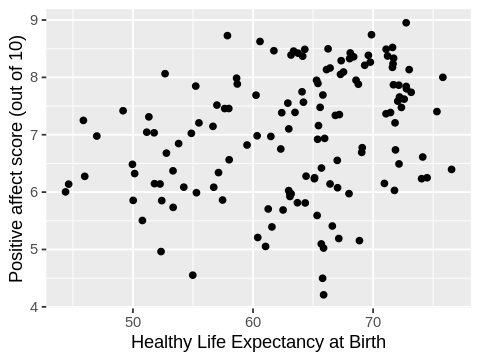

In [13]:
options(repr.plot.width = 4, repr.plot.height = 3)

happy_plot <- ggplot(reduced_happy_df, aes(x = Healthy.life.expectancy.at.birth, y = Positive.affect)) + 
    geom_point() + 
    xlab("Healthy Life Expectancy at Birth") + 
    ylab("Positive affect score (out of 10)")

# your code here

happy_plot


In [14]:
test_1.4()

[1] "Success!"


**Question 1.5** 
<br> {points: 2}

In one sentence or two, describe what you see in the scatterplot above? Does there appear to be a correlation between life expectancy at birth and postive affect?

There appears to be no relationship between life expectancy at birth and positive affect.

**Question 1.6** 
<br> {points: 3}

Choose any other column in the data set to plot against healthy life expectancy at birth. Create the scatter plot in the cell below (and remember to create proper English axis labels) with healthy life expectancy at birth on the x-axis. Name the plot `happy_plot_2`.

Warning message:
“Removed 7 rows containing missing values (geom_point).”

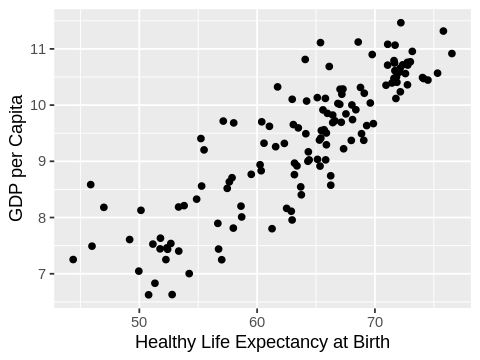

In [15]:
# Any other column in acceptable. 

# your code here
happy_step1_plot_2 <- filter(happy_df, year == 2017)
reduced_happy_df_plot_2  <- select(happy_step1, Healthy.life.expectancy.at.birth, Log.GDP.per.capita)

options(repr.plot.width = 4, repr.plot.height = 3)

happy_plot_2 <- ggplot(reduced_happy_df_plot_2, aes(x = Healthy.life.expectancy.at.birth, y = Log.GDP.per.capita)) + 
    geom_point() + 
    xlab("Healthy Life Expectancy at Birth") + 
    ylab("GDP per Capita")

happy_plot_2

In [16]:
# The tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

**Question 1.7**
<br> {points: 3}

In a sentence or two, describe what you see in the scatterplot above? Does there appear to be a correlation between healthy life expectancy at birth and the other variable you plotted?

Yes, there appears to be a strong positive correlation between healthy life expectancy at birth and GDP per Capita, the other variable that I plotted.

## 2. Whistler Snow

Skiing and snowboarding are huge in British Columbia. Some of the most perfect slopes are found close to home. In fact, just two hours north of Vancouver, we reach the mountain-bearing city of Whistler. With cold weather and plenty of snowfall, Whistler is the ideal destination for winter sports fanatics. 

One thing skiiers and snowboarders want is fresh snow! When are they most likely to find this? In the `data` directory we have two year long data sets from [Environment Canada from the Whistler Roundhouse Station](http://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?StationID=348&Year=2007&Month=3&Day=1&timeframe=2&type=bar&MeasTypeID=snow&searchType=stnProx&txtRadius=25&optProxType=navLink&txtLatDecDeg=50.128889166667&txtLongDecDeg=122.95483333333&optLimit=specDate&selRowPerPage=25&station=WHISTLER) (on Whistler mountain). This weather station is located 1,835 m above sea level. 

To answer the question when are skiiers and snowboarders most likely to find fresh snow (and when you should plan your next ski trip to Whistler) you will create a line plot where the date is on the x-axis and the total snow per day in centimetres (the column named `Total Snow cm` in the data file) is on the y-axis. Given that we have data for 2 years (2017 & 2018), we will create two plots, one for each year and see if there is any consistent trend we can observe across the two years.

**Question 2.1** Multiple Choice: 
<br> {points: 1}

What are we going to plot on the y-axis?

A. total precipitation per day in centimetres

B. total snow on the ground in centimetres

C. total snow per day in centimetres

D. total rain per day in centimetres

*Assign your answer to an object called `answer2.1`.*

In [17]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer2.1 <- 'C'

In [18]:
test_2.1()

[1] "Success!"


**Question 2.2.0** 
<br> {points: 1}

Read in the file named `eng-daily-01012018-12312018.csv` from the data directory. Preview the file to choose the correct `read_*` function and argument values to get the data into R. Name it `whistler_2018`.

*Note: You'll see a lot of entries of the form `NA`. This is the symbol R uses to denote missing data. Interestingly, you can do math and make comparisons with `NA`: for example,* `NA + 1 = NA`, `NA * 3 = NA`, `NA > 3 = NA`. *Most operations on `NA` return `NA`. This may seem a bit weird, but it makes things much simpler in R since it removes the need to write any special code to handle missing data!*

In [26]:
# your code here
whistler_2018 <- read_csv('data/eng-daily-01012018-12312018.csv', skip = 25)
head(whistler_2018)

Parsed with column specification:
cols(
  .default = col_logical(),
  `Date/Time` = col_date(format = ""),
  Year = col_double(),
  Month = col_character(),
  Day = col_character(),
  `Data Quality` = col_character(),
  `Max Temp (°C)` = col_double(),
  `Min Temp (°C)` = col_double(),
  `Mean Temp (°C)` = col_double(),
  `Heat Deg Days (°C)` = col_double(),
  `Cool Deg Days (°C)` = col_double(),
  `Total Rain (mm)` = col_double(),
  `Total Snow (cm)` = col_double(),
  `Total Precip (mm)` = col_double(),
  `Snow on Grnd (cm)` = col_double()
)
See spec(...) for full column specifications.


Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),⋯,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2018-01-01,2018,01,01,†,6.0,NA,-6.0,NA,0.0,⋯,0,NA,0.0,NA,187,NA,NA,NA,NA,NA
2018-01-02,2018,01,02,†,5.5,NA,0.0,NA,2.8,⋯,0,NA,0.0,NA,183,NA,NA,NA,NA,NA
2018-01-03,2018,01,03,†,6.0,NA,0.0,NA,3.0,⋯,0,NA,0.0,NA,180,NA,NA,NA,NA,NA
2018-01-04,2018,01,04,†,5.0,NA,1.5,NA,3.3,⋯,0,NA,2.5,NA,179,NA,NA,NA,NA,NA
2018-01-05,2018,01,05,†,3.0,NA,0.5,NA,1.8,⋯,0,TRUE,13.4,NA,175,NA,NA,NA,NA,NA
2018-01-06,2018,01,06,†,0.0,NA,-3.0,NA,-1.5,⋯,2,NA,2.0,NA,169,NA,NA,NA,NA,NA


In [27]:
test_2.2.0()

[1] "Success!"


**Question 2.2.1** 
<br> {points: 1}

Looking at the column names of the `whistler_2018` data frame you can see we have the white space in column names problem again. Use `make.names` to remove these.

In [35]:
# your code here
colnames(whistler_2018) <- make.names(colnames(whistler_2018))
colnames(whistler_2018)

[1] "Date.Time"                 "Year"                     
 [3] "Month"                     "Day"                      
 [5] "Data.Quality"              "Max.Temp...C."            
 [7] "Max.Temp.Flag"             "Min.Temp...C."            
 [9] "Min.Temp.Flag"             "Mean.Temp...C."           
[11] "Mean.Temp.Flag"            "Heat.Deg.Days...C."       
[13] "Heat.Deg.Days.Flag"        "Cool.Deg.Days...C."       
[15] "Cool.Deg.Days.Flag"        "Total.Rain..mm."          
[17] "Total.Rain.Flag"           "Total.Snow..cm."          
[19] "Total.Snow.Flag"           "Total.Precip..mm."        
[21] "Total.Precip.Flag"         "Snow.on.Grnd..cm."        
[23] "Snow.on.Grnd.Flag"         "Dir.of.Max.Gust..10s.deg."
[25] "Dir.of.Max.Gust.Flag"      "Spd.of.Max.Gust..km.h."   
[27] "Spd.of.Max.Gust.Flag"

In [29]:
test_2.2.1()

[1] "Success!"


**Question 2.3** 
<br> {points: 1}

Create a line plot where the date is on the x-axis and the total snow per day in centimetres is on the y-axis by filling in the `...` in the code below. Before you create your plot, use `make.names` to remove the whitespace from all the column names. Do not modify the column names further or in any other way (otherwise the autograding won't work for this question).

Ensure you create axis labels that are formatted in proper English. Assign your plot to an object called `whistler_2018_plot`. 

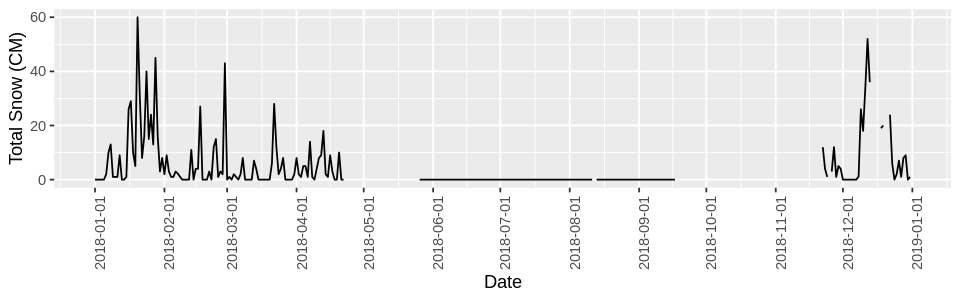

In [41]:
options(repr.plot.width = 8, repr.plot.height = 2.5)
whistler_2018_plot <-  ggplot(whistler_2018, aes(x = Date.Time, y = Total.Snow..cm.)) + 
    geom_line() +
    xlab('Date') +
    ylab('Total Snow (CM)') +
    scale_x_date(date_breaks = "1 month") + # labels every month
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) # rotates x axis labels to be vertical

# your code here
# fail() # No Answer - remove if you provide an answer
whistler_2018_plot

In [42]:
test_2.3()

[1] "Success!"


**Question 2.4** 
<br> {points: 2}

Looking at the line plot above for 2018, of the months when it snowed, what top 2 months had the most fresh snow? 

January, December.

**Question 2.5**
<br> {points: 3}

Repeat the data loading and plot creation using the file `eng-daily-01012017-12312017.csv` to visualize the same data for the year 2017. Name the plot `whistler_2017_plot`.

Parsed with column specification:
cols(
  .default = col_double(),
  `Date/Time` = col_date(format = ""),
  Month = col_character(),
  Day = col_character(),
  `Data Quality` = col_character(),
  `Max Temp Flag` = col_character(),
  `Min Temp Flag` = col_logical(),
  `Mean Temp Flag` = col_character(),
  `Heat Deg Days Flag` = col_character(),
  `Cool Deg Days Flag` = col_character(),
  `Total Rain Flag` = col_logical(),
  `Total Snow Flag` = col_logical(),
  `Total Precip Flag` = col_logical(),
  `Snow on Grnd Flag` = col_logical(),
  `Dir of Max Gust (10s deg)` = col_logical(),
  `Dir of Max Gust Flag` = col_logical(),
  `Spd of Max Gust (km/h)` = col_logical(),
  `Spd of Max Gust Flag` = col_logical()
)
See spec(...) for full column specifications.


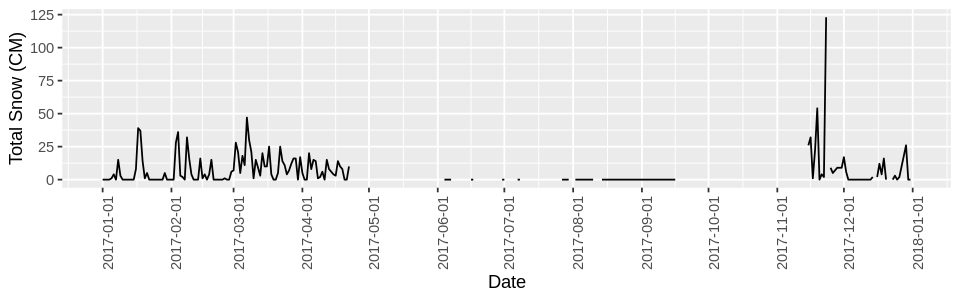

In [47]:
whistler_2017_data <- read_csv('data/eng-daily-01012017-12312017.csv', skip = 24)

colnames(whistler_2017_data) <- make.names(colnames(whistler_2017_data))

options(repr.plot.width = 8, repr.plot.height = 2.5)

whistler_2017_plot <- ggplot(whistler_2017_data, aes(x = Date.Time, y = Total.Snow..cm.)) + 
    geom_line() +
    xlab('Date') +
    ylab('Total Snow (CM)') +
    scale_x_date(date_breaks = "1 month") + # labels every month
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) # rotates x axis labels to be vertical

whistler_2017_plot

# your code here
# fail() # No Answer - remove if you provide an answer

In [ ]:
# The tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

**Question 2.6**
<br> {points: 3}

Looking at the line plot above for 2017, of the months when it snowed, what months had the most fresh snow? Are these the same as in 2018 (*hint - you might want to add a code cell where you plot the two plots right after each other so you can easily compare them in one screen view*)? Is there any advantage of looking at 2 years worth of data?

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

## 3. Reading from a Database

In `worksheet_02`, you'll recall that we opened a database stored in a `.db` file. This involved a lot more effort than just opening a `.csv`, `.tsv`, or any of the other plaintext / Excel formats. To be honest, it was a bit of a pain to use a database in that setting, since we had to use `dbplyr` to translate tidyverse-like commands (`filter`, `select`, `head`, etc) into SQL commands that the database understands. We didn't run into this problem in the worksheet, but *not all* tidyverse commands can currently be translated with SQLite databases. For example, with an SQLite database, we can compute a mean, but can't easily compute a median.

**Why should we bother with databases at all then?**

Databases become really useful in a large-scale setting:

- they enable storing large datasets across multiple computers with automatic redundancy and backups
- they enable multiple users to access them simultaneously and remotely without conflicts and errors 
- they provide mechanisms for ensuring data integrity and validating input
- they provide security to keep data safe

For example: there are around [4 billion](https://www.internetlivestats.com/google-search-statistics/) Google searches conducted daily as of 2019. Can you imagine if Google stored all of the data from those queries in a single `.csv` file!? Chaos would ensue. 

To reap the real benefits of databases, we'll need to move to a more fully-powered one: [PostgreSQL](https://www.postgresql.org/). We'll begin by loading the `DBI` and `dbplyr` packages that R uses to talk to databases, as well as the `RPostgres` package that provides the interface between these packages and PostgreSQL databases (note the similarity to the `RSQLite` package from `worksheet_02`).


In [ ]:
#run this to load the libraries we need
library(dbplyr)
library(DBI)
library(RPostgres)
library(lubridate) #we'll also need the lubridate library to convert different date/time formats


### Investigating Trends in Crowdfunding

[Kickstarter](www.kickstarter.com) is an online crowd-funding site where people can post projects they want to do, but don't have the financial resources needed to complete them by themselves. Others can *pledge* money to the project, and the pledges are fulfilled if the funding reaches a *goal* amount. It's been around for a few years now; in this section, we'll investigate how the amount of funding successful projects get has changed over time.

**Question 3.0**
<br>{points: 2}

Databases are often stored *remotely* (i.e., not on your computer or on this JupyterHub). Your first task is to load the Kickstarter data from a PostgreSQL database stored remotely on the UBC statistics network.


URL: `r7k3-mds1.stat.ubc.ca`

Username: `dsci100`

Password: `dsci100`

Database Name: `kickstarter`

Table Name: `projects`

We've provided the code to do this below. Replace each `...` with one of the 5 above items. 

*Note 1: Due to the UBC firewall, to get this to work you'll need to be connected to the UBC network or use the UBC VPN.*

*Note 2: As this database will be used by the entire class, you will only have read access (no write permissions).*

*Assign the resulting database connection object to* `connection` *and the project table data to* `project_data`.

In [ ]:
#connection <- dbConnect(RPostgres::Postgres(), dbname = ...,
#                 host = ..., port = 5432,
#                 user = ..., password = ...)
#project_data <- tbl(connection, ...)

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_3.0()

We can now use the `colnames` function to see what columns are available in the `project_data` table.

In [ ]:
colnames(project_data)

**Question 3.1**
<br> {points: 1}

If we want to plot compare pledged and goal amounts of funding over time for successful projects, which three columns should we `select` from the table?

A. `id`, `slug`, `pledged`

B. `pledged`, `goal`, `deadline`

C. `pledged`, `usd_pledged`, `location_id`

D. `currency`, `state`, `country`

*Assign your answer to a variable named* `answer3.1`. *For example,* `answer3.1 <- 'F'`.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_3.1()

**Question 3.2**
<br> {points: 3}

Now we'll visualize the data. In order to do this, we need to take the correct subset of data from the table and use `ggplot` to plot the result. Note that we make the scatter plot slightly transparent (using `alpha = 0.01` in the code below) because there is so much data that it would otherwise be hard to see anything (*overplotting*).

In the below cell, you'll see some lines of code (currently commented out with `#` characters). Remove the comments and rearrange these lines of code to plot the ratio of pledged and goal funding as a function of project deadline date for all successful (where pledged funding is greater than goal funding) projects in the dataset.

*Note: there is a lot of data to plot here, so give it a moment to display!*

*Hint: you'll want to put all the dataframe manipulation functions first, and then the plotting functions afterward. Also note that some lines have a `+` at the end, meaning they're in the middle of the plotting code!*


In [ ]:
#scale_y_continuous(trans='log10', breaks=c(1,10,100,1000))+
#funding_over_time_plot <- ggplot(prj, aes(x=as_datetime(deadline), y=pledged/goal))+
#prj <- filter(prj, pledged > goal)
#ylab('Pledged Funding / Goal Funding')
#theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
#funding_over_time_plot
#prj <- select(project_data, c('deadline', 'pledged', 'goal'))
#geom_point(alpha=0.01)+
#xlab('Date')+

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_3.2()

**Question 3.3**
<br> {points: 3}

Describe the relationship (if any) between the ratio of pledged/goal funding and time, as well as any patterns in the data that you might not have expected in advance.


DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 3.4**
<br> {points: 1}

Finally, we'll save the project data to a local file in the `data/` folder called `project_data.csv`. Recall that we don't want to try to download and save the *entire dataset* (way too much data!) from the database, but only the `tbl` object named `prj`. So you will need to use the `collect` function followed by the appropriate `write_*` function.

*Assign the output of collect to an object called `project_df`*

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_3.4()

## 4 (Optional). Reading Data from the Internet

**Question 4.0**

More practice scraping! To keep ourselves out of legal hot water, we will get more practice scraping data using a website that was created for that purpose: http://books.toscrape.com/

Your task here is to scrape the prices of the science fiction novels on [this page](http://books.toscrape.com/catalogue/category/books/science-fiction_16/index.html) and determine the maximum, minimum and average price of science fiction novels at this bookstore. Tidy up and nicely present your results by creating a data frame called `sci_fi_stats` that has 2 columns, one called `stats` that contains the words `max`, `min` and `mean` and once called `value` that contains the calculated value for each of these.

The functions for maximum, minimum and average in R are listed in the table below:

| Calculation to perform | Function in R |
| ---------------------- | ------------- |
| maximum                | `max`         |
| minimum                | `min`         |
| average                | `mean`        |

Some other helpful hints:
- If you end up scraping some characters other than numbers you will have to use `str_replace_all` from the `stringr` library to remove them (similar to what we did with the commas in worksheet_02).
- Use `as.numeric` to convert your character type numbers to numeric type numbers before you pass them into the `max`, `min` and `mean` functions.
- If you have `NA` values in your objects that you need to pass into the `max`, `min` and `mean` functions, you will need to set the `na.rm` argument in these functions to `TRUE`.
- use the function `c` to create the vectors that will go in your data frame, for example, to create a vector with the values 10, 16 and 13 named ages, we would type: `ages <- c(10, 16, 13)`.
- use the function `tibble` to create the data frame from your vectors.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
sci_fi_stats

**Question 4.1**

In worksheet_02 you had practice scraping data from the web. Now that you have the skills, should you go scrape that cool/interesting website you have been dreaming of harvesting data from? Maybe, but maybe not... You really should check the website's Terms of Service first and also consider the application you have planned for the data after you scrape it.

List 3 websites you might be intersted in scraping data from (for fun, for profit, for research/education). List their URLs as part of your answer. For these 3 websites, search for their Terms of Service page. Tell us if such a page exists, and if it does, provide the link to it as well as tell us whether or not they allow web scraping of their website.

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

### Bonus/optional additional readings on legalities of web scraping:

Here are two news stories about web scraping and their legal implications this year:

- [D.C. Court: Accessing Public Information is Not a Computer Crime](https://www.eff.org/deeplinks/2018/04/dc-court-accessing-public-information-not-computer-crime)

- [Dear Canada: Accessing Publicly Available Information on the Internet Is Not a Crime](https://www.eff.org/deeplinks/2018/04/dear-canada-accessing-publicly-available-information-internet-not-crime)